In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

### Trying ensemble for all of the configurations

#### Baseline

In [10]:
configuration = "_baseline.pt"

model_names = ["alexnet", "densenet161", "mobilenet_v3_large", "resnet50", "vgg19_bn"]
display_model_names = ["AlexNet", "DenseNet", "MobileNetV3-Large", "ResNet-50", "VGG-19BN"]

file_names = ["../model_results/" + m + configuration for m in model_names]

true_labels = []
model_preds = []

# gather the info
for f in file_names:
    model_result = torch.load(f, weights_only=True)
    
    true_labels = model_result["true_labels"]
    model_preds.append(model_result["model_preds"])

ensemble_preds = np.array(model_preds).mean(axis=0) > 0.5

res = sum(true_labels == ensemble_preds) / len(true_labels) * 100

print(f"Ensemble method accuracy for baseline: {res[0]:.3f}%")

Ensemble method accuracy for baseline: 79.661%


#### Cropped

In [11]:
configuration = "_crop.pt"

model_names = ["alexnet", "densenet161", "mobilenet_v3_large", "resnet50", "vgg19_bn"]
display_model_names = ["AlexNet", "DenseNet", "MobileNetV3-Large", "ResNet-50", "VGG-19BN"]

file_names = ["../model_results/" + m + configuration for m in model_names]

true_labels = []
model_preds = []

# gather the info
for f in file_names:
    model_result = torch.load(f, weights_only=True)
    
    true_labels = model_result["true_labels"]
    model_preds.append(model_result["model_preds"])

ensemble_preds = np.array(model_preds).mean(axis=0) > 0.5

res = sum(true_labels == ensemble_preds) / len(true_labels) * 100

print(f"Ensemble method accuracy for crop: {res[0]:.3f}%")

Ensemble method accuracy for crop: 81.622%


#### Final

In [12]:
configuration = "_final.pt"

model_names = ["alexnet", "densenet161", "mobilenet_v3_large", "resnet50", "vgg19_bn"]
display_model_names = ["AlexNet", "DenseNet", "MobileNetV3-Large", "ResNet-50", "VGG-19BN"]

file_names = ["../model_results/" + m + configuration for m in model_names]

true_labels = []
model_preds = []

# gather the info
for f in file_names:
    model_result = torch.load(f, weights_only=True)
    
    true_labels = model_result["true_labels"]
    model_preds.append(model_result["model_preds"])

ensemble_preds = np.array(model_preds).mean(axis=0) > 0.5

res = sum(true_labels == ensemble_preds) / len(true_labels) * 100

print(f"Ensemble method accuracy for final: {res[0]:.3f}%")

Ensemble method accuracy for final: 88.713%


##### further analysis on ensemble method for final configuration

In [14]:
# show classification report
from sklearn.metrics import classification_report
print(classification_report(true_labels, ensemble_preds, target_names=["No Mask", "Mask"]))

              precision    recall  f1-score   support

     No Mask       0.84      0.92      0.88       195
        Mask       0.93      0.86      0.89       248

    accuracy                           0.89       443
   macro avg       0.89      0.89      0.89       443
weighted avg       0.89      0.89      0.89       443



In [13]:
# show classification report for resnet50_final
from sklearn.metrics import classification_report
model_result = torch.load("../model_results/vgg19_bn_final_res.pt", weights_only=True)
print(classification_report(model_result["true_labels"], model_result["model_preds"], target_names=["No Mask", "Mask"]))
# show classification report for densenet161_final

              precision    recall  f1-score   support

     No Mask       0.89      0.69      0.78       195
        Mask       0.79      0.93      0.86       248

    accuracy                           0.83       443
   macro avg       0.84      0.81      0.82       443
weighted avg       0.84      0.83      0.82       443



Text(0.5, 1.0, 'Confusion Matrix')

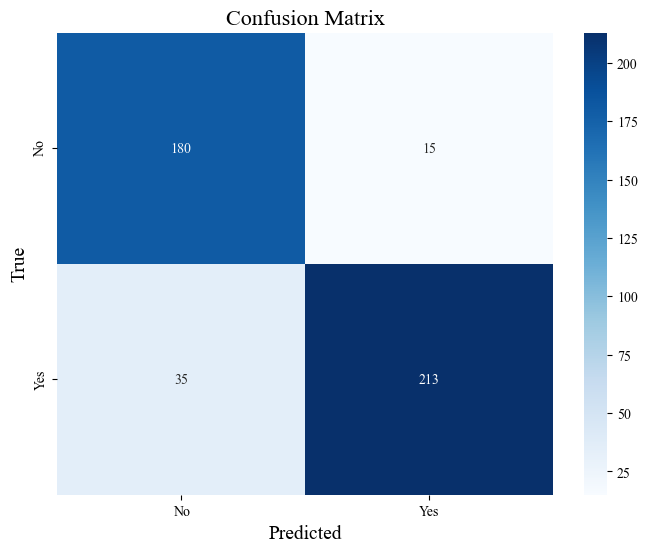

In [15]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(true_labels, ensemble_preds)
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)